In [8]:
with open('etriaikey.txt') as file:
    ai_key=file.read()

#객체 검출
img_file = '사진/cat.jpg'
img_type = img_file.split('.')[-1]
img_type = 'jpg' if img_type =='jfif' else img_type

import urllib3, json, base64
openApiURL = "http://aiopen.etri.re.kr:8000/ObjectDetect"

In [9]:
with open(img_file,'rb') as file:
    img_contents = base64.b64encode(file.read()).decode("utf8")
img_contents[:10]

request_json = {
    "access_key": ai_key,
    "argument": {
        "type": img_type,
        "file": img_contents
    }
}

http = urllib3.PoolManager()
response = http.request(
    "POST",
    openApiURL,
    headers={"Content-Type": "application/json; charset=UTF-8"},
    body=json.dumps(request_json)
)

In [10]:
ai_key

'920d1803-66c1-48a0-a208-ae79139718fc'

In [11]:
response.status
response.data

b'{"result":0,"return_object":{"data":[{"class":"cat","confidence":"0.996642","x":"181","y":"6","width":"423","height":"526"}]}}'

In [12]:
result=json.loads(response.data)
result

{'result': 0,
 'return_object': {'data': [{'class': 'cat',
    'confidence': '0.996642',
    'x': '181',
    'y': '6',
    'width': '423',
    'height': '526'}]}}

In [14]:
obj_list=result['return_object']['data']
obj_list[0]

{'class': 'cat',
 'confidence': '0.996642',
 'x': '181',
 'y': '6',
 'width': '423',
 'height': '526'}

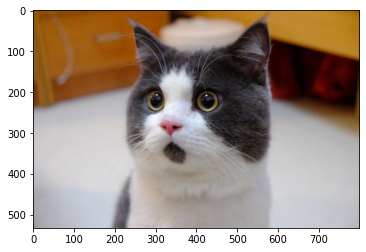

In [15]:
#시각화
from PIL import Image, ImageDraw,ImageFont
import matplotlib.pyplot as plt

img=Image.open(img_file)
plt.imshow(img);

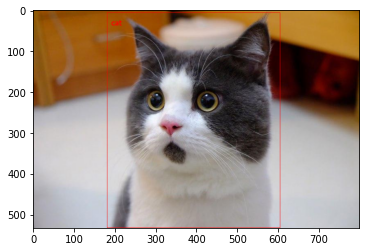

In [25]:
draw=ImageDraw.Draw(img)
obj=obj_list[0]
name=obj['class']
x=int(obj['x'])
y=int(obj['y'])
w=int(obj['width'])
h=int(obj['height'])

draw.rectangle(( (x,y),(x+w,y+h)),outline=(255,0,0),width=1)
draw.text((x+10,y+10),name,font=ImageFont.truetype('malgun.ttf', 20),fill=(255,0,0))

plt.imshow(img)